In [1]:
import pandas as pd

# Step 1: Load CSV from URL
url = 'https://raw.githubusercontent.com/egorpol/beat_it/refs/heads/main/csv/parm_pitch_librosa_complete.csv'
merged_df = pd.read_csv(url)

pd.set_option('display.max_rows', None)

# Display the first few rows
display(merged_df)

,TIME,LABEL,PITCH_HZ_YIN,PITCH_HZ_PIPTRACK,PITCH_HZ_CREPE,PITCH_HZ_PARS,PITCH_NOTE_YIN,PITCH_NOTE_PIPTRACK,PITCH_NOTE_CREPE,PITCH_NOTE_PARS,MIDI_NOTE_YIN,MIDI_NOTE_PIPTRACK,MIDI_NOTE_CREPE,MIDI_NOTE_PARS,LABEL_MANUAL,MIDI_NOTE_MANUAL
0,8.823583,s,672.015343,633.25073,594.451396,680.959705,E5,D♯5,D5,F5,76,75,74,77,C#5,73
1,10.193563,s,694.305843,768.93210,611.910417,1103.911038,F5,G5,D♯5,C♯6,77,79,75,85,C#5,73
2,11.865396,s,567.179266,633.75060,610.343455,591.159263,C♯5,D♯5,D♯5,D5,73,75,75,74,C#5,73
3,12.829021,s,647.459480,694.76230,605.812297,814.032076,E5,F5,D♯5,G♯5,76,77,75,80,C#5,73
4,15.243896,s,704.021634,744.12880,658.781752,890.559954,F5,F♯5,E5,A5,77,78,76,81,E5,76
5,17.536875,s,739.782636,881.27180,809.071925,965.646059,F♯5,A5,G♯5,B5,78,81,80,83,A#5,82
6,19.829833,s,691.341215,869.95465,653.853182,1166.658613,F5,A5,E5,D6,77,81,76,86,B5,83
7,22.157646,s,628.831703,640.97400,621.383428,556.887477,D♯5,E5,D♯5,C♯5,75,76,75,73,C5,72
8,24.578312,s,630.858155,759.12910,598.905104,757.117744,D♯5,F♯5,D5,F♯5,75,78,74,78,C#5,73
9,26.935146,s,708.391896,758.82810,705.716345,849.125543,F5,F♯5,F5,G♯5,77,78,77,80,G5,79


In [2]:
import pandas as pd

# Assuming merged_df is your DataFrame and pandas is already imported

# Define the tolerance in semitones
tolerance_semitones = 1

# List of pitch detection methods
methods = ['YIN', 'PIPTRACK', 'CREPE', 'PARS']

# Iterate over each method to compare with manual tags using MIDI notes and tolerance
for method in methods:
    midi_col = f'MIDI_NOTE_{method}'
    match_col = f'{method}_MATCH_TOL'

    # Check if MIDI columns exist to avoid errors
    if midi_col in merged_df.columns and 'MIDI_NOTE_MANUAL' in merged_df.columns:
        # Calculate absolute difference and check if within tolerance
        merged_df[match_col] = (merged_df[midi_col] - merged_df['MIDI_NOTE_MANUAL']).abs() <= tolerance_semitones
    else:
        raise KeyError(f"One of the required columns '{midi_col}' or 'MIDI_NOTE_MANUAL' does not exist in the DataFrame.")

# Display the comparison results with tolerance
comparison_columns = ['TIME', 'MIDI_NOTE_MANUAL'] + [f'{m}_MATCH_TOL' for m in methods]
display(merged_df[comparison_columns])

# Initialize a dictionary to store accuracy results
accuracy = {}

# Calculate accuracy for each method based on tolerance
for method in methods:
    match_col = f'{method}_MATCH_TOL'
    if match_col in merged_df.columns:
        accuracy[method] = merged_df[match_col].mean() * 100  # Convert to percentage
    else:
        accuracy[method] = None  # Handle missing columns if any

# Create a DataFrame for better visualization of accuracy
accuracy_df = pd.DataFrame(list(accuracy.items()), columns=['Method', 'Accuracy (%)'])

# Display the accuracy results
print("Pitch Detection Accuracy Compared to Manual Tags:")
display(accuracy_df)


,TIME,MIDI_NOTE_MANUAL,YIN_MATCH_TOL,PIPTRACK_MATCH_TOL,CREPE_MATCH_TOL,PARS_MATCH_TOL
0,8.823583,73,False,False,True,False
1,10.193563,73,False,False,False,False
2,11.865396,73,True,False,False,True
3,12.829021,73,False,False,False,False
4,15.243896,76,True,False,True,False
5,17.536875,82,False,True,False,True
6,19.829833,83,False,False,False,False
7,22.157646,72,False,False,False,True
8,24.578312,73,False,False,True,False
9,26.935146,79,False,True,False,True


Pitch Detection Accuracy Compared to Manual Tags:


,Method,Accuracy (%)
0,YIN,36.986301
1,PIPTRACK,24.657534
2,CREPE,34.246575
3,PARS,49.315068


Pitch Detection Accuracy Compared to Manual Tags with Multiple Tolerances:


,Tolerance,Method,Accuracy (%)
0,0,YIN,12.328767
1,1,YIN,36.986301
2,2,YIN,49.315068
3,0,PIPTRACK,5.479452
4,1,PIPTRACK,24.657534
5,2,PIPTRACK,45.205479
6,0,CREPE,12.328767
7,1,CREPE,34.246575
8,2,CREPE,52.054795
9,0,PARS,16.438356


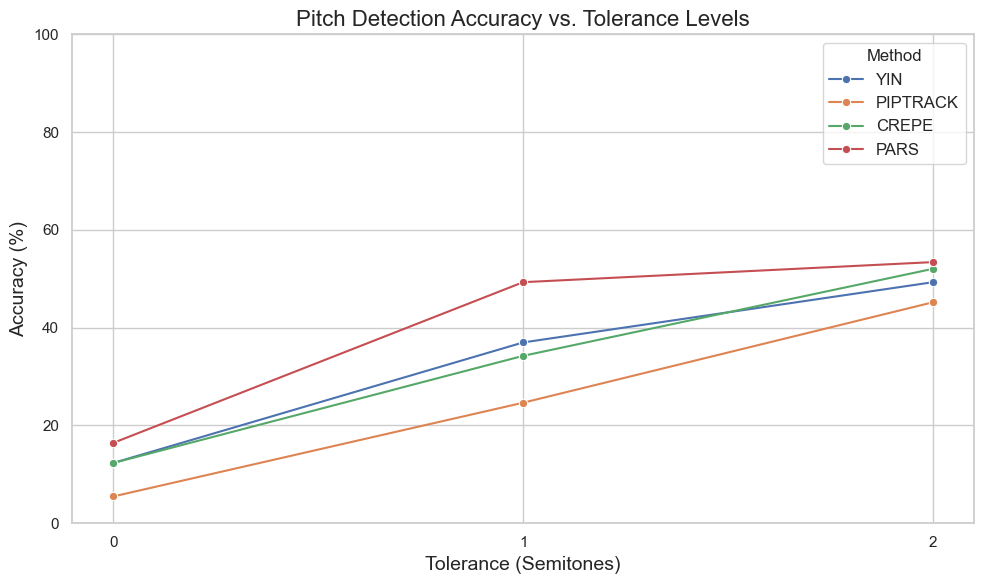

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame

# Define the tolerance levels in semitones
tolerance_levels = [0, 1, 2]

# List of pitch detection methods
methods = ['YIN', 'PIPTRACK', 'CREPE', 'PARS']

# Initialize a dictionary to store accuracy results
accuracy_results = { 'Tolerance': [] }

# Initialize keys for each method
for method in methods:
    accuracy_results[method] = []

# Iterate over each tolerance level
for tolerance in tolerance_levels:
    accuracy_results['Tolerance'].append(tolerance)

    for method in methods:
        midi_col = f'MIDI_NOTE_{method}'

        # Check if required columns exist
        if midi_col not in merged_df.columns:
            raise KeyError(f"Column '{midi_col}' not found in DataFrame.")
        if 'MIDI_NOTE_MANUAL' not in merged_df.columns:
            raise KeyError("Column 'MIDI_NOTE_MANUAL' not found in DataFrame.")

        # Calculate absolute difference
        difference = (merged_df[midi_col] - merged_df['MIDI_NOTE_MANUAL']).abs()

        # Determine matches within the current tolerance
        match = difference <= tolerance

        # Calculate accuracy
        accuracy = match.mean() * 100  # Percentage
        accuracy_results[method].append(accuracy)

# Create a DataFrame from the accuracy results
accuracy_df = pd.DataFrame(accuracy_results)

# Melt the DataFrame to a long format suitable for Seaborn
accuracy_melted = accuracy_df.melt(id_vars='Tolerance', var_name='Method', value_name='Accuracy (%)')

# Display the accuracy DataFrame
print("Pitch Detection Accuracy Compared to Manual Tags with Multiple Tolerances:")
display(accuracy_melted)

# Set the visual style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a line plot with Seaborn
sns.lineplot(data=accuracy_melted, x='Tolerance', y='Accuracy (%)', hue='Method', marker='o')

# Customize the plot
plt.title('Pitch Detection Accuracy vs. Tolerance Levels', fontsize=16)
plt.xlabel('Tolerance (Semitones)', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xticks(tolerance_levels)  # Ensure only defined tolerances are shown
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100%
plt.legend(title='Method', fontsize=12, title_fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

# Optional: Save the plot
# plt.savefig('pitch_detection_accuracy.png', dpi=300)
# plt.savefig('pitch_detection_accuracy.pdf')
